In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("..\\..")
import numpy as np
import pickle
rid=__import__("Ridge regression")
iso=__import__("Isotropic features")
isom=iso.isomodel()
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
A,x_0,x_1,beta,r,n,d=isom.generate()

In [4]:
"""
Import and read the results from ridge regression file
"""


import os
path = "..\\data"
collapse=[]
la=[]
for k in os.listdir(path)[1:]:
    newpath=path+"\\"+k
    for j in os.listdir(newpath):
        if "-b.pickle" in j:
            file=open(newpath+"\\"+j,"rb")
            y=pickle.load(file)
            collapse.append(y)
        else:
            file=open(newpath+"\\"+j,"rb")
            y=pickle.load(file)
            la.append(y)

In [5]:
nosaepc=collapse[0:4]
sameepc=collapse[4:]
nosaepla=la[0:4]
sameepla=la[4:]

In [6]:
lambda_=list(np.around(np.linspace(0,0.1,100,endpoint=False),decimals=6))
temp=list(np.around(np.linspace(0.1,3,291),decimals=5))
lambda_=lambda_+temp

In [7]:
from matplotlib import pyplot as plt 
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import mpl_toolkits.mplot3d as p3d

In [8]:
map_vir = cm.get_cmap(name='Spectral')
y=np.linspace(0.1,1,4)
normy = plt.Normalize(min(y),max(y))
norm_y = normy(y)
color = map_vir(norm_y)

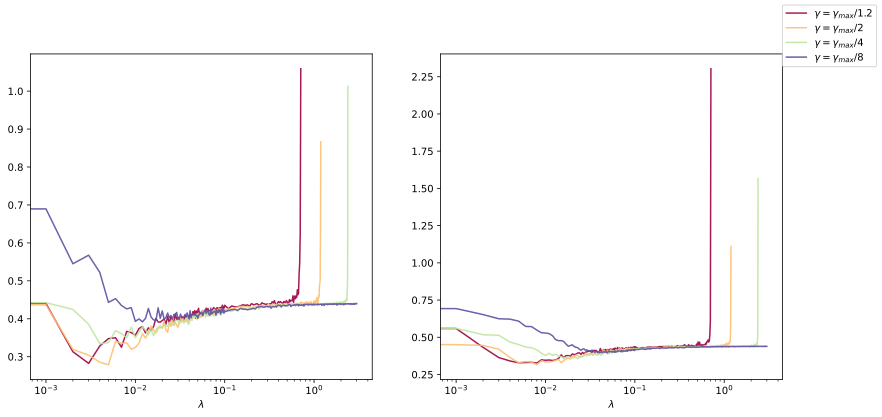

In [9]:
lambda_=np.array(lambda_)
a=[0.35,0.6,0.75,0.9]
k=["1.2","2","4","8"]
fig=plt.figure(figsize=(13.5,6))
ax1=plt.subplot(1,2,1)
for i in range(4):
    new=[j for j in range(len(lambda_)) if lambda_[j] not in nosaepc[i]]
    err_3=np.array(nosaepla[i])
    ax1.plot(lambda_[new],err_3[new],alpha=a[3],color=color[i],label=r'$\gamma=\gamma_{max}/$'+k[i])
    ax1.set_xlabel(r"$\lambda$")
    ax1.set_xscale("log")
ax2=plt.subplot(1,2,2)
for i in range(4):
    new=[j for j in range(len(lambda_)) if lambda_[j] not in sameepc[i]]
    err_3=np.array(sameepla[i])
    ax2.plot(lambda_[new],err_3[new],alpha=a[3],color=color[i],label=r'$\gamma=\gamma_{max}/$'+k[i])
    ax2.set_xlabel(r"$\lambda$")
    ax2.set_xscale("log")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper right')
fig.savefig("plot-2.pdf",dpi=600,format="pdf")

In [10]:
sg1=[]
lambda_=np.array(lambda_)
for i in range(4):
    new=[j for j in range(1,len(lambda_)) if lambda_[j] not in sameepc[i]]
    err_3=np.array(sameepla[i])
    sg1.append(float(lambda_[np.where(err_3==min(err_3[new]))]))

In [11]:
sg2=[]
for i in range(4):
    new=[j for j in range(1,len(lambda_)) if lambda_[j] not in nosaepc[i]]
    err_3=np.array(nosaepla[i])
    sg2.append(float(lambda_[np.where(err_3==min(err_3[new]))]))

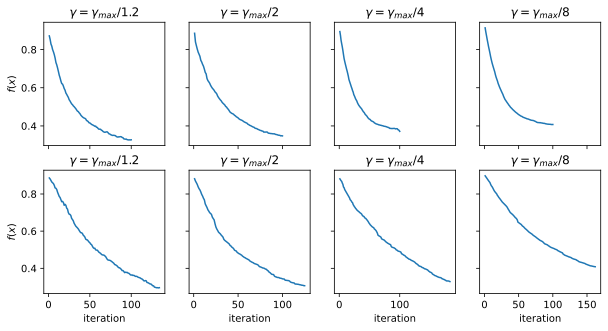

In [12]:
lambda_=sg1+sg2
model=["same","different"]

sg=[(2/(r*np.sum(np.diag(np.dot(A.T,A)/n))/d))/1.2,
   (2/(r*np.sum(np.diag(np.dot(A.T,A)/n))/d))/2,
   (2/(r*np.sum(np.diag(np.dot(A.T,A)/n))/d))/4,
   (2/(r*np.sum(np.diag(np.dot(A.T,A)/n))/d))/8]

ss=(2/(r*np.sum(np.diag(np.dot(A.T,A)/n))/d))/1.2
ridm=rid.ridge(A,x_0,x_1,beta,r,n,d,ss)
ridm.plot(lambda_,sg,model)